<a href="https://colab.research.google.com/github/nyang-cook/Colabatory/blob/main/%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83(K_Nearest_Neighbor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

<ipython-input-61-263f5f737d08>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9583333333333334
테스트 데이터 점수: 0.9666666666666667


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.325
테스트 데이터 점수: 0.36666666666666664


In [ ]:
cross_validate(
    estimator =KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.8s finished


{'fit_time': array([0.00180006, 0.00199127, 0.00149322, 0.0013566 , 0.00124073]),
 'score_time': array([0.00562739, 0.0063467 , 0.00512481, 0.00491047, 0.00510406]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

최적의 알고리즘 이웃 수 가중치를 알려주는 GridSearchCV

In [ ]:
param_grid=[{'n_neighbors':[3,5,7],
             'weights':['uniform', 'distance'],
             'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max  = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf,xx,yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df["Target"] = y
iris_comp_df


,0,1,Target
0,-23.580931,-0.522060,0
1,-26.291704,-1.093696,0
2,-26.193335,0.053057,0
3,-26.638256,-0.321696,0
4,-23.545013,-0.941377,0
...,...,...,...
145,11.363099,-4.289077,2
146,10.691204,-1.015444,2
147,11.097084,-3.357184,2
148,13.195991,-3.724547,2


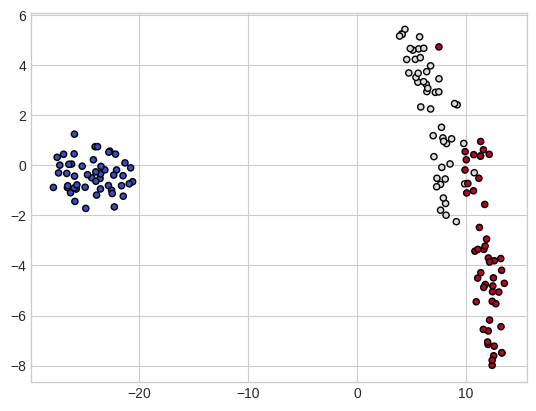

In [ ]:
plt.scatter(X_comp[:,0], X_comp[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

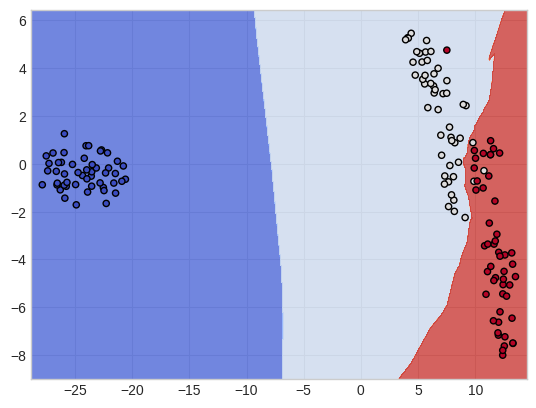

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X, y = X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
cancer_train_Df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_Df['target'] = y_train
cancer_train_Df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,41.78,78.44,470.9,0.09994,0.06885,0.023180,0.03002,0.2911,0.07307,1
1,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289,1
2,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,30.28,98.27,715.5,0.12870,0.15130,0.062310,0.07963,0.2226,0.07617,1
3,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,...,26.98,86.43,520.5,0.12490,0.19370,0.256000,0.06664,0.3035,0.08284,1
4,15.10,16.39,99.58,674.5,0.11500,0.18070,0.113800,0.085340,0.2001,0.06467,...,18.33,105.90,762.6,0.13860,0.28830,0.196000,0.14230,0.2590,0.07779,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,12.36,18.54,79.01,466.7,0.08477,0.06815,0.026430,0.019210,0.1602,0.06066,...,27.49,85.56,544.1,0.11840,0.19630,0.193700,0.08442,0.2983,0.07185,1
451,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.26540,0.4601,0.11890,0
452,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.11080,0.07723,0.025330,0.02832,0.2557,0.07613,1
453,15.78,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,...,30.50,130.30,1272.0,0.18550,0.49250,0.735600,0.20340,0.3274,0.12520,0


In [ ]:
cancer_test_Df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_Df['target'] = y_test
cancer_test_Df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321,1
1,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.2878,0.31860,0.14160,0.2660,0.09270,1
2,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182,1
3,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0
4,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,0.05883,...,25.58,96.74,694.4,0.1153,0.1008,0.05285,0.05556,0.2362,0.07113,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,19.31,114.20,808.2,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362,1
110,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,29.41,142.10,1359.0,0.1681,0.3913,0.55530,0.21210,0.3187,0.10190,0
111,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,27.78,149.60,1304.0,0.1873,0.5917,0.90340,0.19640,0.3245,0.11980,0
112,12.86,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.02315,0.1718,0.05997,...,24.82,91.88,622.1,0.1289,0.2141,0.17310,0.07926,0.2779,0.07918,1


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_data = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9538461538461539
테스트 데이터 점수 : 0.9385964912280702


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("테스트 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.9736263736263736
테스트 데이터 점수 : 0.9649122807017544


In [ ]:

estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [ ]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.7s finished


{'fit_time': array([0.00392318, 0.00613451, 0.0041275 , 0.00282741, 0.00306797]),
 'score_time': array([0.03620005, 0.03239918, 0.00305653, 0.00276995, 0.00369   ]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier())])

In [ ]:
param_grid = [{"model__n_neighbors":[3,5,7],
               'model__weights': ['uniforn', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniforn', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df["Target"] = y
cancer_comp_df

,0,1,Target
0,42.104282,-12.535738,0
1,42.269810,-9.850520,0
2,37.661800,-9.865570,0
3,-17.582714,1.816186,0
4,36.543030,-7.761000,0
...,...,...,...
564,43.790070,-9.225799,0
565,38.597885,-9.270696,0
566,22.164120,-2.738216,0
567,40.147724,-9.924445,0


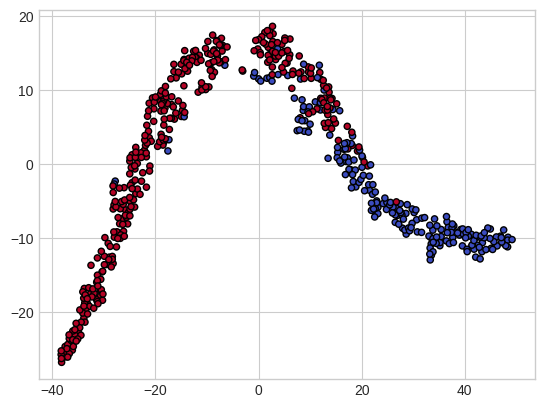

In [ ]:
plt.scatter(X_comp[:,0], X_comp[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

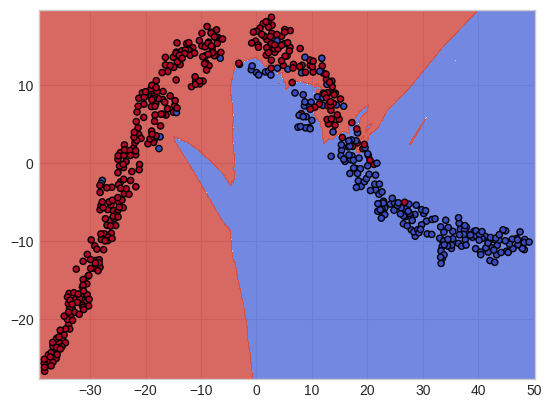

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [ ]:
boston = fetch_openml(name='boston', version=1, as_frame=True)

In [ ]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
X, y = boston.data , boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
boston_train_df = pd.DataFrame(data=X_train, columns=boston.feature_names)
boston_train_df['TARGET'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304.0,18.4,350.45,12.64,16.1
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402.0,17.0,384.30,4.45,32.9
12,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311.0,15.2,390.50,15.71,21.7
470,4.34879,0.0,18.10,0,0.580,6.167,84.0,3.0334,24,666.0,20.2,396.90,16.29,19.9
389,8.15174,0.0,18.10,0,0.700,5.390,98.9,1.7281,24,666.0,20.2,396.90,20.85,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
297,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289.0,16.0,396.90,15.84,20.3
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1


In [ ]:
boston_test_df = pd.DataFrame(data=X_test, columns=boston.feature_names)
boston_test_df['TARGET'] = y_train
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391.0,19.2,396.90,13.59,NaN
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300.0,15.3,394.72,8.23,NaN
107,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,NaN
118,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432.0,17.8,338.63,15.37,NaN
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.59005,0.0,21.89,0,0.624,6.372,97.9,2.3274,4,437.0,21.2,385.76,11.12,NaN
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315.0,16.4,395.18,9.25,NaN
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,NaN
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277.0,18.6,396.90,23.09,NaN


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6812043466860975
테스트 데이터 점수 : 0.4961821319522054


In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.8434002188157597
테스트 데이터 점수 : 0.6705777208660748


In [ ]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [ ]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    4.3s finished


{'fit_time': array([0.03403735, 0.04466295, 0.02321362, 0.01217651, 0.01185703]),
 'score_time': array([0.01696396, 0.02397704, 0.01748347, 0.00636315, 0.01644158]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

In [ ]:
param_grid = [{"model__n_neighbors":[3,5,7],
               'model__weights': ['uniforn', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniforn', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [ ]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [ ]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df["Target"] = y
boston_comp_df

,0,Target
0,-20.020531,24.0
1,-40.950481,21.6
2,-41.707726,34.7
3,-43.112171,33.4
4,-43.261833,36.2
...,...,...
501,-27.433578,22.4
502,-28.080772,20.6
503,-28.869349,23.9
504,-28.823696,22.0


<ipython-input-100-698c306d1617>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors="k")


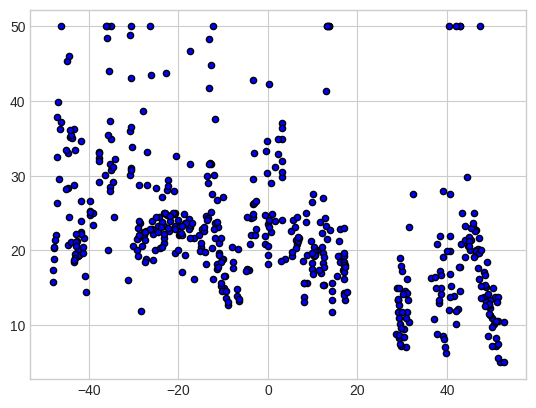

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

<ipython-input-102-b248e08de00b>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors="k")
<ipython-input-102-b248e08de00b>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors="k")


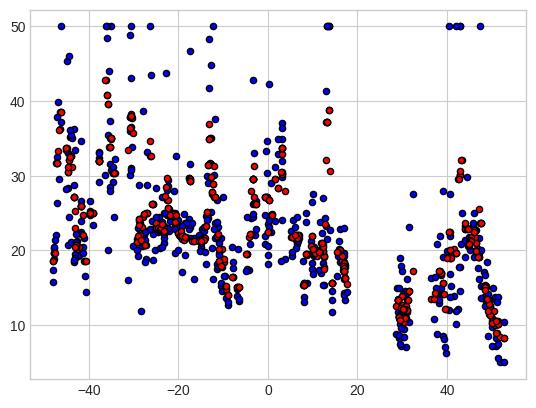

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors="k")

### 캘리포니아 주택 가격 데이터